# COVID-19 Twitter Sentiments - Emotion Analysis

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [53]:
dataUnfiltered = pd.read_csv("randomized_sample.csv", index_col = "Unnamed: 0")
dataUnfiltered = dataUnfiltered[["tweet_ID", "user_ID", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "valence_intensity", "anger_intensity", "fear_intensity", "sadness_intensity",
             "joy_intensity", "sentiment_category", "emotion_category", "keyword_used"]].convert_dtypes()
dataUnfiltered.head(20)

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
8183,1224615942803664896,223101960,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan
1538,1224720188752433154,17818643,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan
8497,1224610619384528896,19383099,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan
2398,1224707720995069952,43381817,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan
9313,1224596331315986433,3002161959,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan
35,1224742927525507072,468328783,1,0,0,0,0,0,0,0,0,0,0.338,0.482,0.582,0.517,0.162,negative,fear,wuhan
680,1224732940233371649,711319983423414272,1,1,0,0,0,0,0,0,0,0,0.507,0.376,0.416,0.409,0.325,neutral,no specific emotion,wuhan
2400,1224707682013151234,3334888083,1,0,0,1,0,0,0,0,0,0,0.548,0.388,0.370,0.344,0.414,positive,joy,wuhan
5161,1224665758996815874,635140045,1,1,0,0,0,0,0,0,0,0,0.360,0.414,0.649,0.499,0.247,negative,fear,wuhan
8970,1224602175806021632,1045800102332264448,1,0,1,1,0,0,0,0,0,0,0.506,0.408,0.465,0.402,0.344,neutral,no specific emotion,wuhan


In [154]:
data = dataUnfiltered[dataUnfiltered["emotion_category"] != "no specific emotion"] # drop neutral emotions

## Do individuals feel negative emotions more intensely than positive ones?

### Breakdown of Emotional Intensities

In [110]:
meanIntensities = pd.Series.to_frame(data.loc[:,('anger_intensity', 'fear_intensity',
       'sadness_intensity', 'joy_intensity')].mean(), name = "Mean").reset_index()

In [111]:
meanIntensities

,index,Mean
0,anger_intensity,0.445374
1,fear_intensity,0.447205
2,sadness_intensity,0.418905
3,joy_intensity,0.297148


In [114]:
countEmotions = pd.Series.to_frame(data["emotion_category"].value_counts(), name = "num_occurences").reset_index()

In [115]:
countEmotions

,index,num_occurences
0,anger,205483
1,fear,197249
2,joy,190320
3,sadness,39415


In [133]:
intensities_df = meanIntensities.merge(countEmotions, how = "left", on = meanIntensities.index ).drop(columns = ["index_y", "key_0"])
intensities_df = intensities_df.rename(columns = {"index_x": "emotions", "Mean": "mean"}).set_index("emotions")

In [139]:
intensities_df

,mean,num_occurences
emotions,,
anger_intensity,0.445374,205483
fear_intensity,0.447205,197249
sadness_intensity,0.418905,190320
joy_intensity,0.297148,39415


#### Visualizing the Intensities

**Number of Occurences:**

<AxesSubplot:ylabel='emotions'>

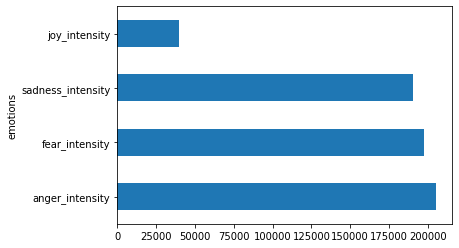

In [141]:
intensities_df["num_occurences"].plot.barh()

<u>Dropping outlier (`joy_intensity`)</u>

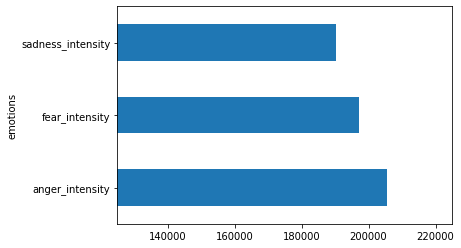

In [150]:
intensities_df["num_occurences"].drop("joy_intensity").plot.barh()
plt.xlim(125000, 225000)
plt.show()

**Means:**

<AxesSubplot:ylabel='emotions'>

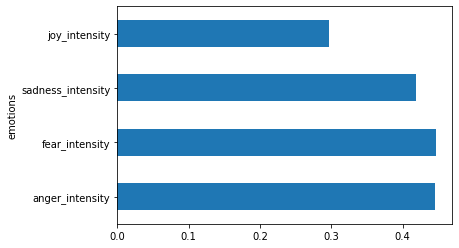

In [153]:
intensities_df["mean"].plot.barh()

### All records with Negative Valence Intensity

In [35]:
negative_valence = data[data["valence_intensity"] < 0.5]

In [36]:
negative_valence.head(20)

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
8183,1224615942803664896,223101960,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan
1538,1224720188752433154,17818643,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan
8497,1224610619384528896,19383099,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan
2398,1224707720995069952,43381817,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan
9313,1224596331315986433,3002161959,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan
35,1224742927525507072,468328783,1,0,0,0,0,0,0,0,0,0,0.338,0.482,0.582,0.517,0.162,negative,fear,wuhan
5161,1224665758996815874,635140045,1,1,0,0,0,0,0,0,0,0,0.360,0.414,0.649,0.499,0.247,negative,fear,wuhan
2156,1224711405829607428,2935639364,0,0,0,1,0,0,0,0,0,0,0.395,0.400,0.529,0.399,0.208,negative,fear,wuhan
4720,1224673315513438209,7228352,1,0,0,0,0,0,0,0,0,0,0.355,0.497,0.612,0.504,0.240,negative,fear,wuhan
8129,1224616785242013696,2820507071,0,1,1,0,0,0,0,0,0,0,0.433,0.519,0.545,0.472,0.197,negative,fear,wuhan


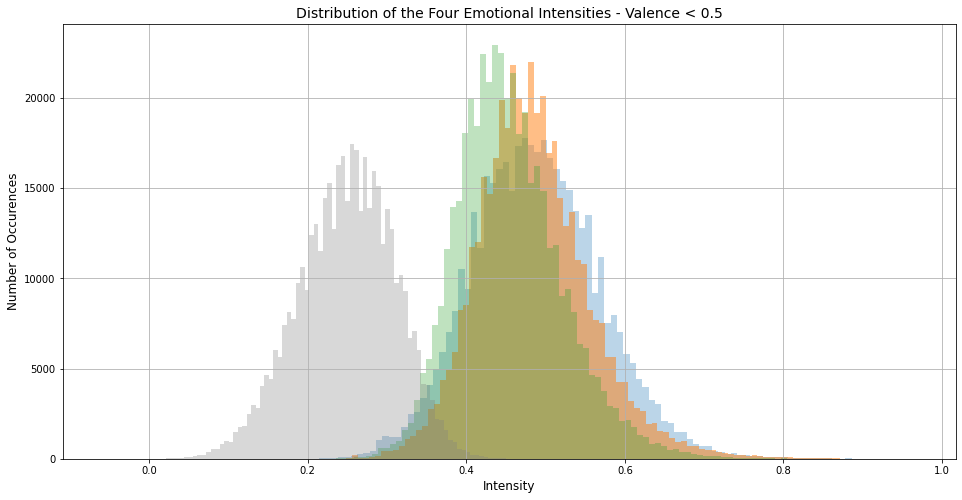

In [44]:
plt.figure(figsize = (16, 8))
plt.title("Distribution of the Four Emotional Intensities - Valence < 0.5", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
negative_valence["fear_intensity"].hist(bins = 100, alpha = 0.3) # blue
negative_valence["anger_intensity"].hist(bins = 100, alpha = 0.5) # orange
negative_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3) # green
negative_valence["joy_intensity"].hist(bins = 100, alpha = 0.3, color = "grey") # grey
plt.show()

### All records with Positive Valence Intensity

In [38]:
pos_valence = data[data["valence_intensity"] >= 0.5]

In [39]:
pos_valence.head(20)

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
2400,1224707682013151234,3334888083,1,0,0,1,0,0,0,0,0,0,0.548,0.388,0.370,0.344,0.414,positive,joy,wuhan
3131,1224697244378705925,2330878992,1,0,1,0,0,0,0,0,0,0,0.537,0.378,0.379,0.364,0.350,positive,joy,wuhan
2321,1224708876530061313,494732159,1,1,0,0,0,0,0,0,0,0,0.521,0.448,0.423,0.444,0.424,positive,joy,wuhan
4410,1224678668510924802,1202543449850798080,1,0,0,0,0,0,0,0,0,0,0.580,0.370,0.414,0.374,0.420,positive,joy,wuhan
8579,1224609172961910784,33879571,1,0,0,0,0,0,0,0,0,0,0.538,0.305,0.300,0.358,0.438,positive,joy,wuhan
5366,1224662390895190023,785926171,1,1,0,0,0,0,0,0,0,0,0.564,0.353,0.478,0.352,0.366,positive,joy,wuhan
2423,1224707345550319625,845755284429533184,1,1,1,1,1,0,0,0,0,0,0.717,0.187,0.227,0.231,0.552,very positive,joy,wuhan
2793,1224701643834281984,3346139542,1,1,0,0,0,0,0,0,0,0,0.597,0.299,0.309,0.260,0.378,positive,joy,wuhan
9135,1224599593872084992,2977895316,0,0,0,0,1,1,0,0,0,0,0.539,0.295,0.343,0.386,0.373,positive,joy,wuhan
6135,1224650353515192320,16220179,1,1,1,0,0,0,0,0,0,0,0.541,0.408,0.418,0.338,0.430,positive,joy,wuhan


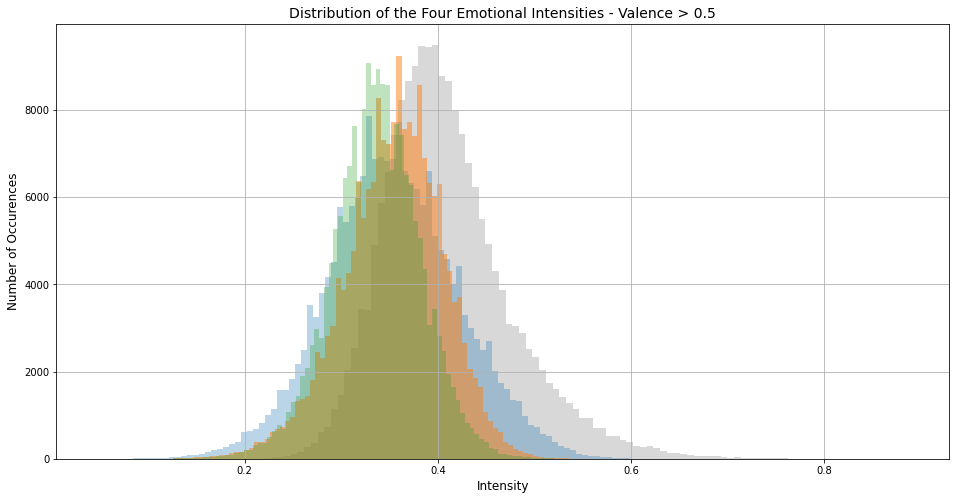

In [45]:
plt.figure(figsize = (16, 8))
plt.title("Distribution of the Four Emotional Intensities - Valence > 0.5", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
pos_valence["joy_intensity"].hist(bins = 100, alpha = 0.3, color = "grey") # grey
pos_valence["fear_intensity"].hist(bins = 100, alpha = 0.3) # blue
pos_valence["anger_intensity"].hist(bins = 100, alpha = 0.5) # orange
pos_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3) # green
plt.show()

**Comparison between Positive and Negative Valence Intensities (Using Means)**

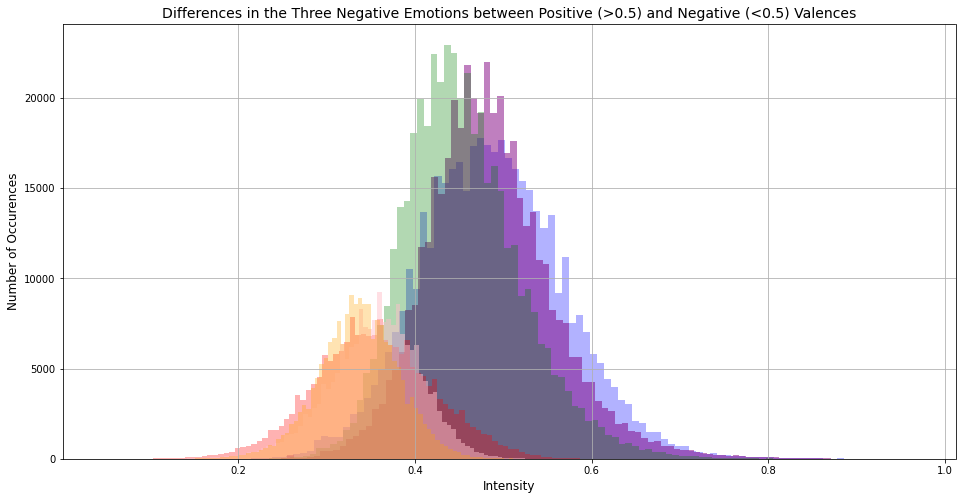

In [41]:
plt.figure(figsize = (16, 8))
plt.title("Differences in the Three Negative Emotions between Positive (>0.5) and Negative (<0.5) Valences", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
negative_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, color = "blue") # blue
negative_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, color = "purple") # orange
negative_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, color = "green") # green
pos_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, color = "red" ) # blue
pos_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, color = "pink" ) # orange
pos_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, color = "orange") # green

plt.show()

Negative Valence Intensity (i.e. Negative overall "mood") translates to a much greater intensity in all of the singular emotions. Likewise, Positive Valence Intensity (i.e. Positive "mood") does not seem to greatly affect the intensity of all the four emotions.

### Determining Topic Closeness

In [170]:
import statsmodels.formula.api as smf
from sklearn.cluster import AgglomerativeClustering as agglom
from sklearn.cluster import KMeans as kmeans

In [187]:
cluster = pd.Series(kmeans(n_clusters = 30).fit_predict(data.loc[:,"t1":"t10"]), index = data.index)

In [188]:
cluster

8183         4
1538         7
8497         3
2398         4
9313         5
            ..
75630016     4
75630399    21
75630607    18
75630517     4
75630390     7
Length: 632467, dtype: int32

In [ ]:
cluster2 = pd.Series(kmeans(n_clusters = 30).fit_predict(data.loc[:,"t1":"t10"]), index = )

In [ ]:
dist_mat = pd.DataFrame(dist(data.loc[:, "anger_intensity":"t10"], movies.loc[:, "t1":"t10"]), index = data["title"], columns = movies["title"])